# Project 3:  Melbourne Housing Project
Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guideline as:

## 1.	Examine and explore data (visualization, interactions among features)

In [1]:
# load libraries
import pandas as pd
pd.set_option("max_columns", 50)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
# Load data
data = pd.read_csv("Melbourne_housing_FULL.csv")
#%% Basic Information
#print(data.isnull().sum())
print('size of data:',data.shape)
print('columns names of data:',data.columns)

size of data: (34857, 21)
columns names of data: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [3]:
## B. Describing the data & visualizations

# Check null and data type
#%% Which variable has null?
#print(data.isnull().sum() > 0)
print('How many columns have null values:',len(data.columns[data.isnull().sum() > 0]))
#null_vars = data.columns[data.isnull().sum() > 0]
#data.info()
print('             ')
print('Data types:')
print('             ')
print(data.info())

How many columns have null values: 14
             
Data types:
             
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    3

In [4]:
 # Removed null value in Price (target variable)
data = data[~data['Price'].isnull()]

In [5]:
# Check null and data type
#%% Which variable has null?
#print(data.isnull().sum() > 0)
print('How many columns have null values:',len(data.columns[data.isnull().sum() > 0]))
#null_vars = data.columns[data.isnull().sum() > 0]
#data.info()
print('             ')
print('Data types:')
print('             ')
print(data.info())

How many columns have null values: 13
             
Data types:
             
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    2

In [6]:
# Check for duplicates
print('How many duplicated row: ',data[data.duplicated(keep=False)].shape[0])

How many duplicated row:  0


In [7]:
# Quick look at data: 
data.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,27247,27247,27247.000000,27247,2.724700e+04,27247,27247,27247,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,27244,20993.000000,20993.000000,27244,27244.000000
unique,345,26751,NaN,3,NaN,5,349,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Nelson,28/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,727,4,NaN,18472,NaN,17515,2735,879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520,NaN,NaN,8524,NaN
mean,NaN,NaN,2.992293,NaN,1.050173e+06,NaN,NaN,NaN,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,NaN,-37.806963,144.996711,NaN,7566.781089
std,NaN,NaN,0.954795,NaN,6.414671e+05,NaN,NaN,NaN,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,NaN,0.091619,0.120680,NaN,4492.382418
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,NaN,-37.860900,144.925300,NaN,4294.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,NaN,-37.800460,145.003200,NaN,6567.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,NaN,-37.748970,145.068770,NaN,10412.000000


In [10]:
print(data.shape)
print(data.isnull().sum()/data.shape[0]*100)

(27247, 21)
Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64


In [11]:
# Drop catelogical features with unique value > 60

data = data.drop(columns=['Suburb', 
                          'Address', 
                          'SellerG','Date','BuildingArea','YearBuilt'
                        ])

In [13]:
data = data.drop(columns=['Landsize'])
print(data.shape)
print(data.isnull().sum()/data.shape[0]*100)

(27247, 14)
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64


In [14]:
# Quick look at data: 
data.describe(include='all')

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,27247.000000,27247,2.724700e+04,27247,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,27244,20993.000000,20993.000000,27244,27244.000000
unique,NaN,3,NaN,5,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,NaN,h,NaN,S,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,NaN,18472,NaN,17515,NaN,NaN,NaN,NaN,NaN,2520,NaN,NaN,8524,NaN
mean,2.992293,NaN,1.050173e+06,NaN,11.280276,3113.796080,3.046237,1.591683,1.715370,NaN,-37.806963,144.996711,NaN,7566.781089
std,0.954795,NaN,6.414671e+05,NaN,6.787469,111.139676,0.955122,0.700880,0.994216,NaN,0.091619,0.120680,NaN,4492.382418
min,1.000000,NaN,8.500000e+04,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,2.000000,NaN,6.350000e+05,NaN,6.400000,3046.000000,2.000000,1.000000,1.000000,NaN,-37.860900,144.925300,NaN,4294.000000
50%,3.000000,NaN,8.700000e+05,NaN,10.500000,3088.000000,3.000000,1.000000,2.000000,NaN,-37.800460,145.003200,NaN,6567.000000
75%,4.000000,NaN,1.295000e+06,NaN,14.000000,3153.000000,4.000000,2.000000,2.000000,NaN,-37.748970,145.068770,NaN,10412.000000


The % distribution of Type features is: 
h    68.0
u    22.0
t    11.0
Name: Type, dtype: float64


C:\Users\Lenovo ThinkPad\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



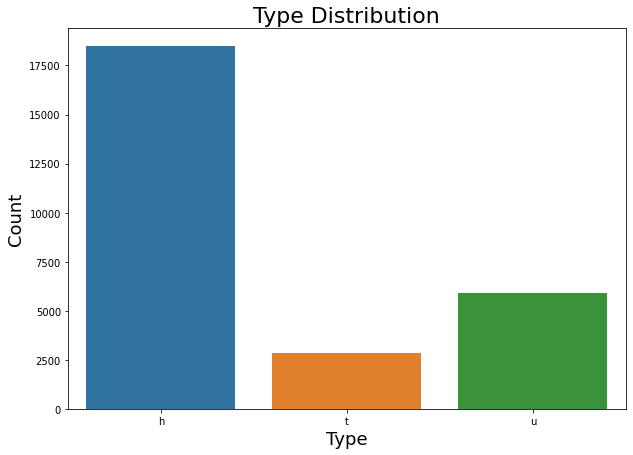

In [15]:
print("The % distribution of Type features is: ")
print(round(data['Type'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(data["Type"])
g.set_title("Type Distribution", fontsize=22)
g.set_ylabel('Count', fontsize=18)
g.set_xlabel('Type', fontsize=18)

plt.show()

The % distribution of Method features is: 
S     64.0
SP    13.0
PI    12.0
VB    10.0
SA     1.0
Name: Method, dtype: float64


C:\Users\Lenovo ThinkPad\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



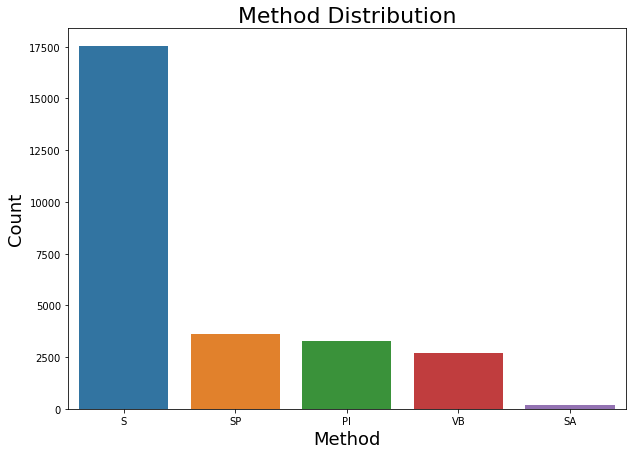

In [16]:
print("The % distribution of Method features is: ")
print(round(data['Method'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(data["Method"])
g.set_title("Method Distribution", fontsize=22)
g.set_ylabel('Count', fontsize=18)
g.set_xlabel('Method', fontsize=18)

plt.show()

The % distribution of CouncilArea features is: 
Boroondara City Council           9.0
Darebin City Council              9.0
Moreland City Council             7.0
Glen Eira City Council            6.0
Moonee Valley City Council        6.0
Melbourne City Council            6.0
Banyule City Council              5.0
Brimbank City Council             5.0
Bayside City Council              5.0
Maribyrnong City Council          4.0
Hume City Council                 4.0
Monash City Council               4.0
Port Phillip City Council         3.0
Yarra City Council                3.0
Stonnington City Council          3.0
Manningham City Council           3.0
Hobsons Bay City Council          3.0
Kingston City Council             3.0
Whittlesea City Council           3.0
Wyndham City Council              2.0
Whitehorse City Council           2.0
Maroondah City Council            1.0
Knox City Council                 1.0
Melton City Council               1.0
Frankston City Council            1.0
Gr

C:\Users\Lenovo ThinkPad\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



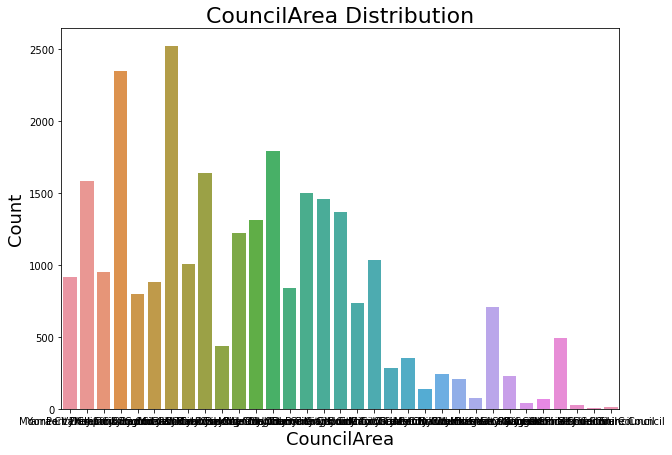

In [17]:
print("The % distribution of CouncilArea features is: ")
print(round(data['CouncilArea'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(data["CouncilArea"])
g.set_title("CouncilArea Distribution", fontsize=22)
g.set_ylabel('Count', fontsize=18)
g.set_xlabel('CouncilArea', fontsize=18)

plt.show()


The % distribution of Regionname features is: 
Southern Metropolitan         31.0
Northern Metropolitan         29.0
Western Metropolitan          21.0
Eastern Metropolitan          12.0
South-Eastern Metropolitan     5.0
Eastern Victoria               1.0
Northern Victoria              1.0
Western Victoria               0.0
Name: Regionname, dtype: float64


C:\Users\Lenovo ThinkPad\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



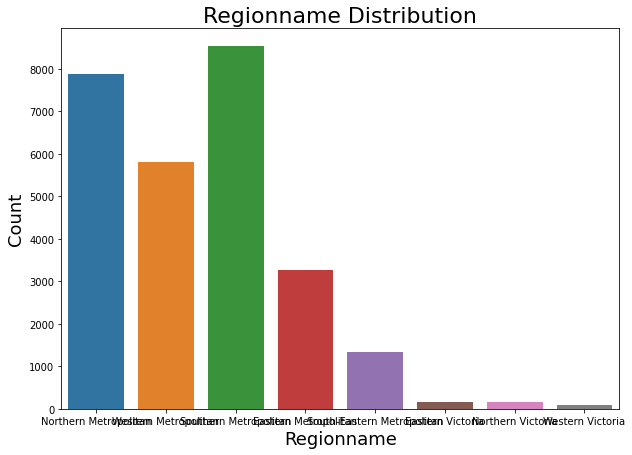

In [18]:
print("The % distribution of Regionname features is: ")
print(round(data['Regionname'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(data["Regionname"])
g.set_title("Regionname Distribution", fontsize=22)
g.set_ylabel('Count', fontsize=18)
g.set_xlabel('Regionname', fontsize=18)

plt.show()


In [19]:
num_var = data.columns[data.dtypes != 'O']
cat_var = data.columns[data.dtypes == 'O']
print('num_var',num_var)
print('cat_var',cat_var)

num_var Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')
cat_var Index(['Type', 'Method', 'CouncilArea', 'Regionname'], dtype='object')


<AxesSubplot:>

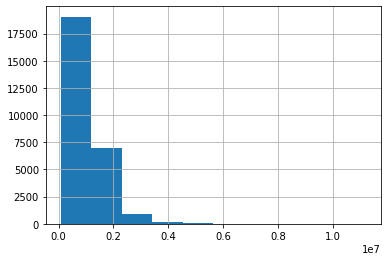

In [20]:
# Price histogram
data.Price.hist()

In [21]:
# numerical vars
num_var = data.columns[data.dtypes != 'O']
print('number of numerical vars:',len(num_var))
print('***')
def corr_cal(var_select) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Price'].corr(data[var_select])
    corr = np.round(corr,3)
    return corr
for c in num_var:
           print(c,':',corr_cal(c))

number of numerical vars: 10
***
Rooms : 0.465
Price : 1.0
Distance : -0.211
Postcode : 0.045
Bedroom2 : 0.43
Bathroom : 0.43
Car : 0.202
Lattitude : -0.216
Longtitude : 0.198
Propertycount : -0.059


C:\Users\Lenovo ThinkPad\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



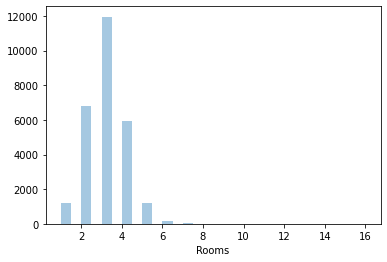

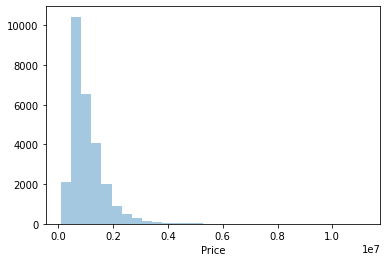

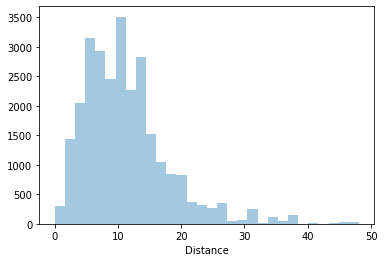

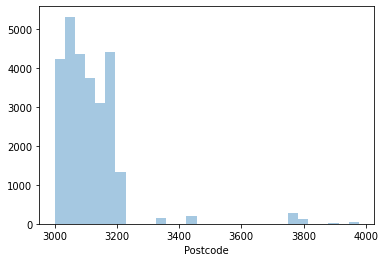

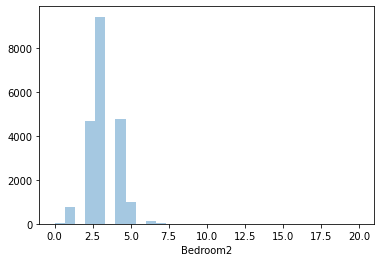

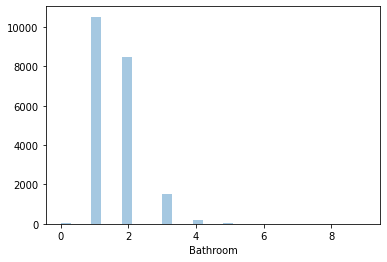

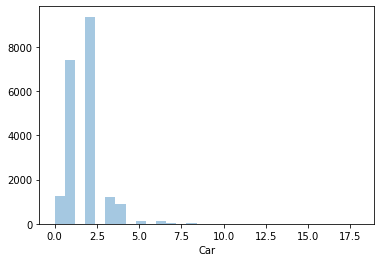

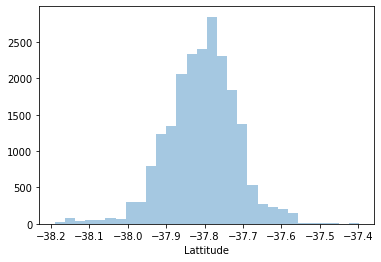

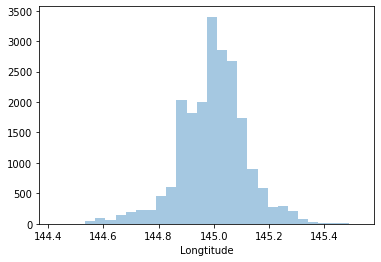

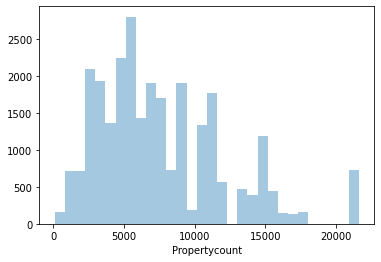

In [22]:
#check num_var dist

for c in num_var:
           sns.distplot(data[c],bins=30,kde=False)
           plt.show() 
            

In [24]:
# dummy cat vars
data = pd.get_dummies(data)

In [25]:
for c in data.columns:
    print(c,':',corr_cal(c))

Rooms : 0.465
Price : 1.0
Distance : -0.211
Postcode : 0.045
Bedroom2 : 0.43
Bathroom : 0.43
Car : 0.202
Lattitude : -0.216
Longtitude : 0.198
Propertycount : -0.059
Type_h : 0.347
Type_t : -0.064
Type_u : -0.346
Method_PI : 0.039
Method_S : 0.003
Method_SA : -0.009
Method_SP : -0.104
Method_VB : 0.074
CouncilArea_Banyule City Council : -0.042
CouncilArea_Bayside City Council : 0.184
CouncilArea_Boroondara City Council : 0.307
CouncilArea_Brimbank City Council : -0.132
CouncilArea_Cardinia Shire Council : -0.023
CouncilArea_Casey City Council : -0.041
CouncilArea_Darebin City Council : -0.071
CouncilArea_Frankston City Council : -0.051
CouncilArea_Glen Eira City Council : 0.026
CouncilArea_Greater Dandenong City Council : -0.049
CouncilArea_Hobsons Bay City Council : -0.015
CouncilArea_Hume City Council : -0.142
CouncilArea_Kingston City Council : -0.024
CouncilArea_Knox City Council : -0.026
CouncilArea_Macedon Ranges Shire Council : -0.017
CouncilArea_Manningham City Council : 0.051


## 2.	Apply the model for prediction with holdout and cross validation

In [27]:
print(data.shape)
print(data.isnull().sum())

(27247, 59)
Rooms                                            0
Price                                            0
Distance                                         1
Postcode                                         1
Bedroom2                                      6441
Bathroom                                      6447
Car                                           6824
Lattitude                                     6254
Longtitude                                    6254
Propertycount                                    3
Type_h                                           0
Type_t                                           0
Type_u                                           0
Method_PI                                        0
Method_S                                         0
Method_SA                                        0
Method_SP                                        0
Method_VB                                        0
CouncilArea_Banyule City Council                 0
CouncilArea_Bayside

In [28]:
data[['Distance','Postcode','Bedroom2','Bathroom', 'Car','Lattitude','Longtitude','Propertycount']].head(4)

,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
1,2.5,3067.0,2.0,1.0,1.0,-37.7996,144.9984,4019.0
2,2.5,3067.0,2.0,1.0,0.0,-37.8079,144.9934,4019.0
4,2.5,3067.0,3.0,2.0,0.0,-37.8093,144.9944,4019.0
5,2.5,3067.0,3.0,2.0,1.0,-37.7969,144.9969,4019.0


In [30]:
data[['Distance','Postcode','Bedroom2','Bathroom', 'Car','Lattitude','Longtitude','Propertycount']].describe()

,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
count,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,20993.000000,20993.000000,27244.000000
mean,11.280276,3113.796080,3.046237,1.591683,1.715370,-37.806963,144.996711,7566.781089
std,6.787469,111.139676,0.955122,0.700880,0.994216,0.091619,0.120680,4492.382418
min,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
25%,6.400000,3046.000000,2.000000,1.000000,1.000000,-37.860900,144.925300,4294.000000
50%,10.500000,3088.000000,3.000000,1.000000,2.000000,-37.800460,145.003200,6567.000000
75%,14.000000,3153.000000,4.000000,2.000000,2.000000,-37.748970,145.068770,10412.000000
max,48.100000,3978.000000,20.000000,9.000000,18.000000,-37.397800,145.526350,21650.000000


In [39]:
# fill na 
data["Distance"].fillna(data["Distance"].mean(), inplace = True) 
data["Postcode"].fillna(int(data["Postcode"].mode()), inplace = True) 
data["Bedroom2"].fillna(data["Bedroom2"].min(), inplace = True) 
data["Bathroom"].fillna(data["Bathroom"].min(), inplace = True) 
data["Car"].fillna(data["Car"].min(), inplace = True) 
data["Lattitude"].fillna(int(data["Lattitude"].mode()), inplace = True) 
data["Longtitude"].fillna(int(data["Longtitude"].mode()), inplace = True) 
data["Propertycount"].fillna(data["Propertycount"].min(), inplace = True) 

In [41]:
print(data.shape)
print(data.isnull().sum())

(27247, 59)
Rooms                                         0
Price                                         0
Distance                                      0
Postcode                                      0
Bedroom2                                      0
Bathroom                                      0
Car                                           0
Lattitude                                     0
Longtitude                                    0
Propertycount                                 0
Type_h                                        0
Type_t                                        0
Type_u                                        0
Method_PI                                     0
Method_S                                      0
Method_SA                                     0
Method_SP                                     0
Method_VB                                     0
CouncilArea_Banyule City Council              0
CouncilArea_Bayside City Council              0
CouncilArea_Boroondara City 

In [81]:
# data for training
X = data.drop(columns=['Price'])
y=data.Price


In [82]:
from sklearn.feature_selection import SelectKBest, f_regression
select20best = SelectKBest(f_regression, k=20)
select20best.fit(X,y)

SelectKBest(k=20, score_func=<function f_regression at 0x000002D5912837B8>)

In [83]:
selected_features = pd.DataFrame({'feature': X.columns,'score':select20best.scores_}) 


In [84]:
print(selected_features.sort_values(by=['score'],ascending=False))
sorted_selected_features = selected_features.sort_values(by=['score'],ascending=False)

                                       feature        score
0                                        Rooms  7526.087835
55            Regionname_Southern Metropolitan  4153.133280
9                                       Type_h  3736.926660
11                                      Type_u  3714.684619
4                                     Bathroom  3538.926191
19         CouncilArea_Boroondara City Council  2837.929262
3                                     Bedroom2  2725.618922
1                                     Distance  1274.316917
5                                          Car  1157.272950
52            Regionname_Northern Metropolitan   991.268900
18            CouncilArea_Bayside City Council   950.891125
56             Regionname_Western Metropolitan   836.626081
6                                    Lattitude   665.441500
7                                   Longtitude   652.245954
44        CouncilArea_Stonnington City Council   628.047162
28               CouncilArea_Hume City C

In [89]:
sorted_selected_features.shape

(58, 2)

In [90]:
#%% Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[sorted_selected_features.feature[:30].to_list()], y,
                                                    test_size = 0.3,
                                                    random_state = 10)
#%% Modeling
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # Initialize model object
# Fit
regressor.fit(X_train, y_train)
# Print coefficient
print('a = ' + str(regressor.coef_))
print('b = ' + str(regressor.intercept_))
# Predict
y_hat = regressor.predict(X_test)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, y_hat)))
print(r2_score(y_test, y_hat))

a = [ 2.47737355e+05  3.46248118e+04  2.64171659e+05 -2.26919363e+05
  1.63889563e+05  3.48189659e+05 -6.29667051e+04 -3.38683895e+04
  2.76358612e+04 -1.69469306e+05  3.52845441e+05 -2.55272737e+05
 -4.66390249e+05 -5.00735615e+05  3.68207401e+05 -2.67940980e+05
 -3.02244617e+05 -1.56039394e+05 -3.14930845e+04 -4.87744550e+05
 -1.32211801e+05 -4.12053734e+05 -1.79546590e+05 -1.70095249e+04
 -9.49360205e+04 -3.72522960e+04  4.65913474e+04  1.80840567e+00
  5.41383776e+03  9.76626624e+04]
b = 55504567.51207721
415952.2376388133
0.5935638681389267


In [92]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X, y)
print(selector.ranking_)

[ 1  1  1  1  1  1  1  1 35  1  7  1 13  8 39  1  9 23  1  1  1 32 22 37
 30  6 24 21  1 16 25 38  1 11 19 10 15 34  3 14 36  4 31 20 17 12  2  5
 28 33  1 29  1 27 18  1  1 26]


In [94]:
RFE_selected_features = pd.DataFrame({'feature': X.columns,'rank':selector.ranking_}) 
sorted_RFE_selected_features = RFE_selected_features.sort_values(by=['rank'])
print(sorted_RFE_selected_features)

                                       feature  rank
0                                        Rooms     1
55            Regionname_Southern Metropolitan     1
52            Regionname_Northern Metropolitan     1
50             Regionname_Eastern Metropolitan     1
32         CouncilArea_Manningham City Council     1
56             Regionname_Western Metropolitan     1
20           CouncilArea_Brimbank City Council     1
19         CouncilArea_Boroondara City Council     1
18            CouncilArea_Bayside City Council     1
15                                   Method_SP     1
11                                      Type_u     1
28               CouncilArea_Hume City Council     1
3                                     Bedroom2     1
5                                          Car     1
1                                     Distance     1
9                                       Type_h     1
4                                     Bathroom     1
2                                     Postcode

In [96]:
#%% Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[sorted_RFE_selected_features.feature[:30].to_list()], y,
                                                    test_size = 0.3,
                                                    random_state = 10)
#%% Modeling
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # Initialize model object
# Fit
regressor.fit(X_train, y_train)
# Print coefficient
print('a = ' + str(regressor.coef_))
print('b = ' + str(regressor.intercept_))
# Predict
y_hat = regressor.predict(X_test)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, y_hat)))
print(r2_score(y_test, y_hat))

a = [ 2.58179013e+05  1.81330102e+04 -3.09614968e+05 -9.10475061e+04
  1.60651833e+04 -3.46341747e+05 -2.44644336e+05  2.54838576e+05
  2.88485635e+05  1.66732374e+04 -2.23342014e+05 -1.78563470e+05
 -7.28900216e+04  2.94502626e+04 -4.05698589e+04  2.59121721e+05
  1.65868859e+05  3.01183506e+02 -3.54873599e+05 -3.13807993e+05
 -1.29760474e+05 -3.03765018e+04 -8.09445929e+04 -3.58559087e+05
 -6.49897195e+04 -3.57797069e+04  6.18771074e+04  3.46867555e+04
 -2.68548250e+04 -1.60800456e+05]
b = 39302203.22239127
420740.63522079424
0.5841523073442382


## 3.	Using PCA, apply the model with holdout and cross validation

In [101]:
#%% Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 10)
from sklearn import decomposition

np.random.seed(5)

pca = decomposition.PCA(n_components=50)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#%% Modeling
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # Initialize model object
# Fit
regressor.fit(X_train, y_train)
# Print coefficient
print('a = ' + str(regressor.coef_))
print('b = ' + str(regressor.intercept_))
# Predict
y_hat = regressor.predict(X_test)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, y_hat)))
print(r2_score(y_test, y_hat))

a = [-7.97929170e+00  2.86288950e+02 -2.74721886e+04  1.25598236e+05
 -2.85466428e+05  1.88392342e+05  1.55552516e+05 -1.90085995e+05
  8.22930518e+04  2.57025779e+05 -3.39264944e+05 -5.09800677e+04
 -5.90091467e+04  1.00621996e+05 -1.12265815e+04  9.85400096e+04
 -1.11505901e+05 -1.80984803e+05  1.75445295e+03  2.71965655e+05
  8.49407706e+04 -2.02888601e+04 -5.05034623e+04 -1.98681049e+04
  1.44217727e+04  2.47391188e+05 -3.20982495e+03  2.09511671e+05
  9.73851968e+04  6.07144848e+01  1.32085785e+05 -6.84228531e+04
 -2.81910718e+05 -9.54853232e+04  4.98838941e+04 -1.05916813e+05
 -2.24441347e+05  1.21190343e+04 -1.28386697e+05 -6.98556779e+02
  5.83755574e+05  7.24576994e+04 -4.30391760e+05  4.11898883e+05
 -2.19830911e+05  3.66974216e+04 -3.68851519e+05 -3.09958692e+05
  6.63473549e+04 -7.14557282e+05]
b = 1049493.3683934635
411116.12738775637
0.6029598675792245


## 4.	Visualize the residue and homoscedasticity

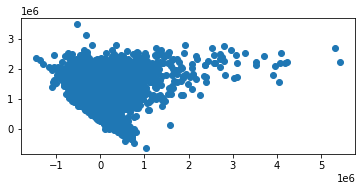

In [102]:
residual = y_test - y_hat
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_hat)

In [104]:
import statsmodels.stats.api as sms
sms.linear_harvey_collier(regressor)

AttributeError: 'LinearRegression' object has no attribute 'model'

0.8016925145307533

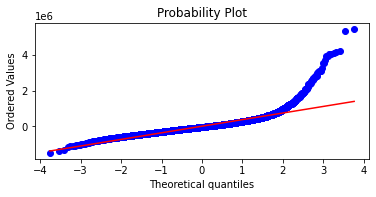

In [105]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [ ]:
regressor.

## 5.	Tune the model if necessary

## 6.	Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)

## 7.	Include conclusions for summary